### 케러스 딥러닝 모델 만들기

* tensorflow - google
* Theano
* pytorch - naver...
* keras - 프랑스 한분이 일반인들도 한번 모델을 구현할 수 있도록 만들어보자.
  * tensorflow, Theano
  * 구글에서 일하게 되면서 tf2.x에 케라스처럼 모델을 만들게 됨.

### 케라스 딥러닝 모델 만들기
 * 데이터 셋 준비
 * 모델 구성
 * 오차 함수, 최적화 알고리즘
 * 모델 학습
 * 모델 평가

In [1]:
import tensorflow as tf
import keras as keras
import sys

In [2]:
print(tf.__version__)
print(keras.__version__)

2.3.1
2.4.3


### 사용할 패키지 불러오기

* MNIST 이미지 : 7만장
* 

In [21]:
import matplotlib.pyplot as plt
import numpy as np

In [35]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils

In [23]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [24]:
X_train_n = X_train.copy()
y_train_n = y_train.copy()
X_test_n = X_test.copy()
y_test_n = y_test.copy()

In [25]:
X_train.shape

(60000, 28, 28)

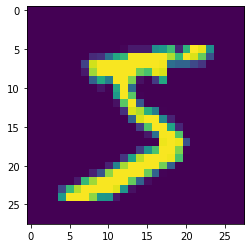

In [26]:
plt.imshow(X_train[0])

In [27]:
print("label={}".format(y_train[0:10]))   # y 레이블 데이터 0~10개 확인

label=[5 0 4 1 9 2 1 3 1 4]


label=[5 0 4 1 9 2 1 3 1 4]


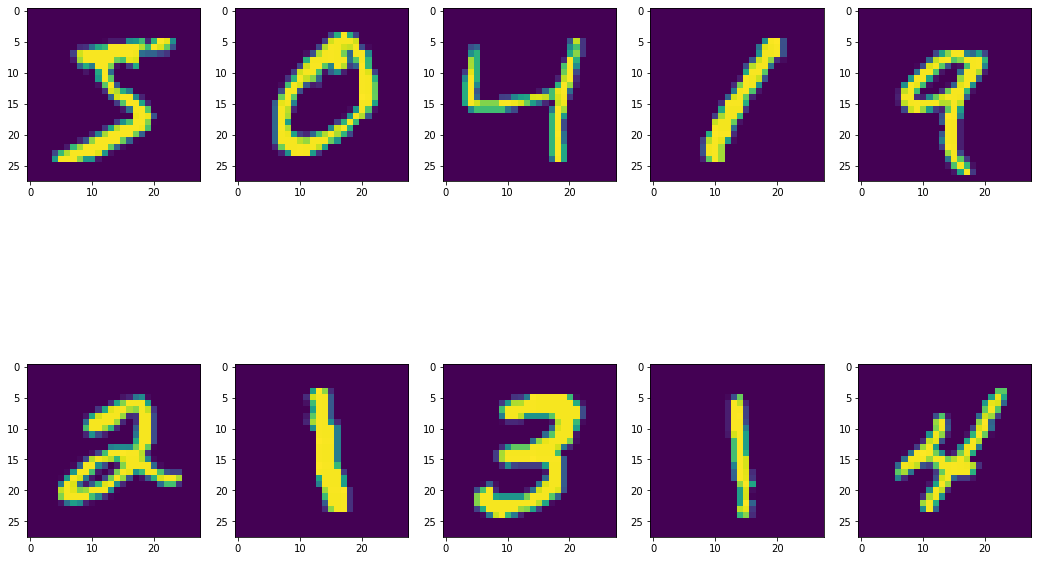

In [28]:
figure,axes = plt.subplots(nrows=2, ncols=5)  # 3행 5열의 구조 
figure.set_size_inches(18,12)  # 전체 크기

print("label={}".format(y_train[0:10]))   # y 레이블 데이터 0~10개 확인

col = 0
for row in range(0,2):
    col = row * 5
    axes[row][0].imshow(X_train[col])  # 0,5,10의 값을 갖는 위치 값 이미지 표시
    axes[row][1].imshow(X_train[col+1])# 1,6,11의 값을 갖는 위치 값 이미지 표시
    axes[row][2].imshow(X_train[col+2])# 2,7,12의 값을 갖는 위치 값 이미지 표시
    axes[row][3].imshow(X_train[col+3])# 3,8,13의 값을 갖는 위치 값 이미지 표시
    axes[row][4].imshow(X_train[col+4])# 4,9,114의 값을 갖는 위치 값 이미지 표시

### 입력층 - 은닉층 - 출력층
 * 입력층에 맞춰주기 위해서 형을 변경

In [29]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [30]:
### 레이블의 데이터를 1D -> 2D 출력층에 맞춘다.
### One-Hot-Encoding 방법을 이용한다. 
print(y_train.shape, y_test.shape)
print(y_train[0:5])

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(y_train.shape, y_test.shape)
print(y_train[0:5])

(60000,) (10000,)
[5 0 4 1 9]
(60000, 10) (10000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [31]:
print(X_train[0][:20])  # (?, 784)

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [34]:
print(X_train[0][:300])   # 784이미지 데이터 

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

### 활성화 함수
 * step function : 음수면 0, 양수면 1
 * sigmoid : 0과 1사이의 값으로 표현
 * tanh 
 * relu : 0이하면 0, 그 이상이면 비례해서 증가 
 * leakyrelu
 * ....
 * softmax : 0 ~ 1사이의 값으로 표시되는데, 전체 값을 더하면 1이되는 것.

In [ ]:
# from keras.layers import Dense, Activation

In [36]:
model = Sequential()
model.add( Dense (units=64, input_dim=28*28, activation='tanh'))
model.add( Dense(32))
model.add( Activation('tanh') )
model.add( Dense(32))
model.add( Activation('tanh') )

model.add( Dense(units=10, activation='softmax') )

### 손실함수(loss function), 최적화 알고리즘 선택

In [37]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [40]:
print( X_train.shape )
print( 60000/32)

(60000, 784)
1875.0


In [38]:
### 모델 학습
hist = model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7056 - accuracy: 0.8258
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3276 - accuracy: 0.9104
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2655 - accuracy: 0.9246
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2295 - accuracy: 0.9342
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2021 - accuracy: 0.9420
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1804 - accuracy: 0.9477
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1629 - accuracy: 0.9528
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1483 - accuracy: 0.9566
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1358 - accuracy: 0.9607
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.125

In [41]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

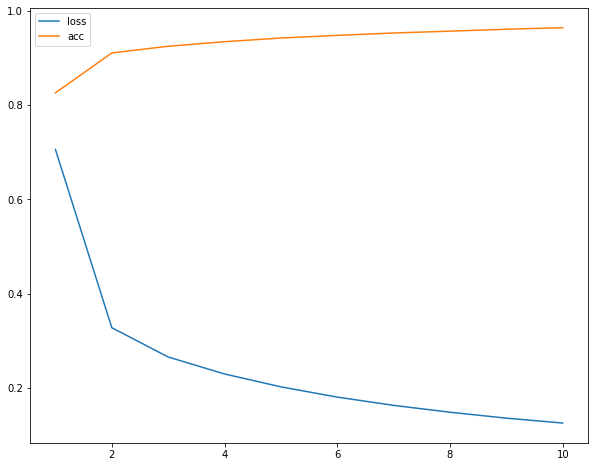

In [42]:
plt.figure(figsize=(10,8),facecolor='white')
x_lim = range(1,11)
plt.plot(x_lim,  hist.history['loss'])
plt.plot(x_lim,  hist.history['accuracy'])
plt.legend(['loss','acc'])

In [43]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)
print(loss_and_metrics)

313/313 [==============================] - 0s 1ms/step - loss: 0.1325 - accuracy: 0.9607
[0.13246364891529083, 0.9606999754905701]


### 딥러닝 학습 조기 종료 함수

In [44]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

In [52]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

In [53]:
X_train = X_train.reshape(50000, 784).astype('float32')/255.0
X_val = X_val.reshape(10000, 784).astype('float32')/255.0
X_test = X_test.reshape(10000, 784).astype('float32')/255.0

In [54]:
# 훈련셋, 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 10000)
val_rand_idxs = np.random.choice(10000, 5000)

X_train = X_train[train_rand_idxs]
y_train = y_train[train_rand_idxs]
X_val = X_val[val_rand_idxs]
y_val = y_val[val_rand_idxs]

### 원핫 인코딩

In [55]:
# 라벨링 전환
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

In [56]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(10000, 784) (10000, 10)
(5000, 784) (5000, 10)
(10000, 784) (10000, 10)


### 모델 구성하기

In [57]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [58]:
# 3. 모델의 오차함수, 최적화 함수 설정
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', 
              metrics=['accuracy'])

In [61]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=50)
hist = model.fit(X_train, y_train,
                epochs=3000,
                batch_size=10,
                validation_data=(X_val, y_val),
                callbacks=[early_stopping])

Epoch 1/3000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.1895 - val_accuracy: 0.9544
Epoch 2/3000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.1888 - val_accuracy: 0.9532
Epoch 3/3000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.1914 - val_accuracy: 0.9538
Epoch 4/3000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.1960 - val_accuracy: 0.9542
Epoch 5/3000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.1949 - val_accuracy: 0.9538
Epoch 6/3000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.1945 - val_accuracy: 0.9552
Epoch 7/3000
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.1961 -

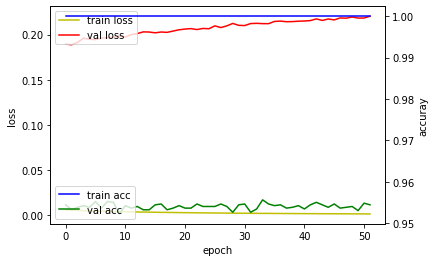

In [62]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()
